## Preprocessing

In [1]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# data science
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

# ML Helpers/Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Algorithms
from sklearn.linear_model import LogisticRegression

# Neural networks
import tensorflow as tf

In [2]:
#  Import and read the charity_data.csv.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# look at dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [4]:
# will data benefit from scaling?
df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = df.drop(columns=["EIN", "NAME"])

In [6]:
# Determine the number of unique values in each column.
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# value counts
for col in cat_cols:
    print(col)
    print(df[col].nunique())
    print(df[col].value_counts())
    print()

APPLICATION_TYPE
17
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

AFFILIATION
6
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

CLASSIFICATION
71
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

USE_CASE
5
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

ORGANIZATION
4
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: i

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
df_apps = df.APPLICATION_TYPE.value_counts()
application_types_to_replace = list(df_apps.loc[df_apps < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
df_class = df.CLASSIFICATION.value_counts()
classifications_to_replace = list(df_class.loc[df_class < 500].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
dfp = pd.get_dummies(df)
dfp.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [11]:
# Split our preprocessed data into our features and target arrays
X = dfp.drop(columns=["IS_SUCCESSFUL"])
y = dfp["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25724, 44) (25724,)
(8575, 44) (8575,)


In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [13]:
# FIRST optimization attempt
# Tuning the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 =  9
hidden_nodes_layer2 = 7

nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 405       
                                                                 
 dense_1 (Dense)             (None, 7)                 70        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 483 (1.89 KB)
Trainable params: 483 (1.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile first optimization model
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Train the model
fit_model_1 = nn_1.fit(X_train_scaled, y_train,epochs=9)

Epoch 1/9
804/804 [==============================] - 2s 2ms/step - loss: 0.6108 - accuracy: 0.6895
Epoch 2/9
804/804 [==============================] - 1s 1ms/step - loss: 0.5638 - accuracy: 0.7276
Epoch 3/9
804/804 [==============================] - 1s 1ms/step - loss: 0.5587 - accuracy: 0.7286
Epoch 4/9
804/804 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7301
Epoch 5/9
804/804 [==============================] - 1s 1ms/step - loss: 0.5530 - accuracy: 0.7313
Epoch 6/9
804/804 [==============================] - 1s 1ms/step - loss: 0.5517 - accuracy: 0.7306
Epoch 7/9
804/804 [==============================] - 2s 2ms/step - loss: 0.5506 - accuracy: 0.7310
Epoch 8/9
804/804 [==============================] - 1s 2ms/step - loss: 0.5499 - accuracy: 0.7313
Epoch 9/9
804/804 [==============================] - 1s 1ms/step - loss: 0.5497 - accuracy: 0.7322


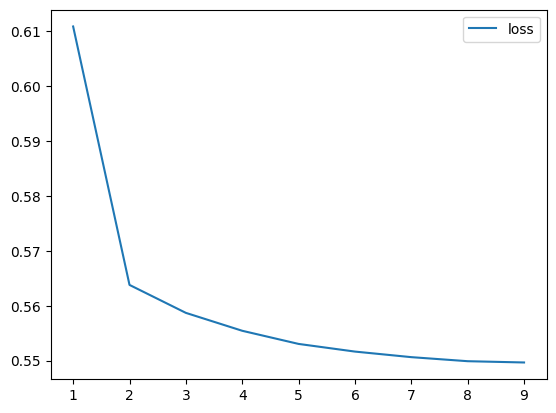

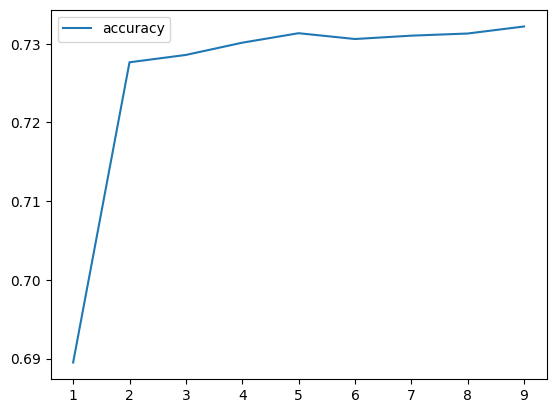

In [16]:
# Create a DataFrame containing first optimization training history
history_df_1 = pd.DataFrame(fit_model_1.history)

# Increase the index by 1 to match the number of epochs
history_df_1.index += 1

# Plot the loss
history_df_1.plot(y="loss")
plt.show()

print()

 # Plot the accuracy
history_df_1.plot(y="accuracy")
plt.show()

In [17]:
# Evaluate the first optimization model using the test data
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
# not much better

268/268 - 0s - loss: 0.5569 - accuracy: 0.7219 - 353ms/epoch - 1ms/step
Loss: 0.5569201111793518, Accuracy: 0.7218658924102783


In [18]:
# SECOND optimization attempt
# Tuning the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 =  9
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 3

nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 405       
                                                                 
 dense_4 (Dense)             (None, 5)                 50        
                                                                 
 dense_5 (Dense)             (None, 3)                 18        
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 477 (1.86 KB)
Trainable params: 477 (1.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile second optimization model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Train the model
fit_model_2 = nn_2.fit(X_train_scaled, y_train,epochs=9)

Epoch 1/9
804/804 [==============================] - 2s 1ms/step - loss: 0.6426 - accuracy: 0.6331
Epoch 2/9
804/804 [==============================] - 1s 2ms/step - loss: 0.5985 - accuracy: 0.7116
Epoch 3/9
804/804 [==============================] - 1s 1ms/step - loss: 0.5862 - accuracy: 0.7179
Epoch 4/9
804/804 [==============================] - 1s 1ms/step - loss: 0.5828 - accuracy: 0.7191
Epoch 5/9
804/804 [==============================] - 1s 1ms/step - loss: 0.5814 - accuracy: 0.7207
Epoch 6/9
804/804 [==============================] - 1s 1ms/step - loss: 0.5801 - accuracy: 0.7207
Epoch 7/9
804/804 [==============================] - 1s 1ms/step - loss: 0.5796 - accuracy: 0.7207
Epoch 8/9
804/804 [==============================] - 1s 1ms/step - loss: 0.5789 - accuracy: 0.7213
Epoch 9/9
804/804 [==============================] - 1s 1ms/step - loss: 0.5787 - accuracy: 0.7211


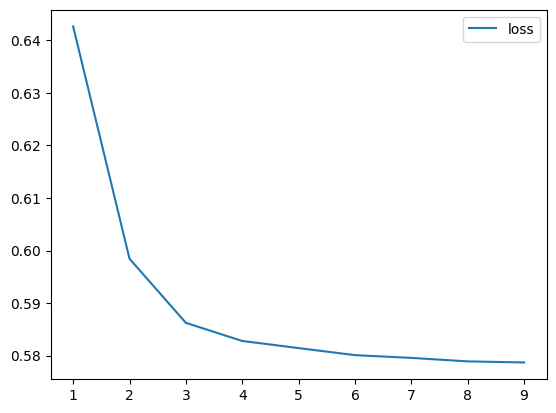

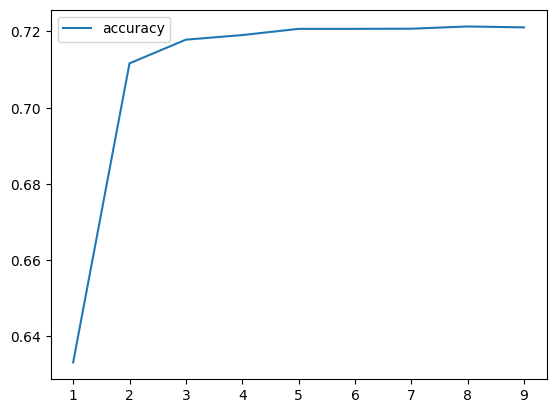

In [21]:
# Create a DataFrame containing second optimization training history
history_df_2 = pd.DataFrame(fit_model_2.history)

# Increase the index by 1 to match the number of epochs
history_df_2.index += 1

# Plot the loss
history_df_2.plot(y="loss")
plt.show()

print()

 # Plot the accuracy
history_df_2.plot(y="accuracy")
plt.show()

In [22]:
# Evaluate the second optimization model using the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
# even worse!

268/268 - 0s - loss: 0.5899 - accuracy: 0.7107 - 321ms/epoch - 1ms/step
Loss: 0.5899463891983032, Accuracy: 0.710670530796051


In [37]:
# Export our second optimization model to HDF5 file
nn_2.save('AlphabetSoupCharity_Optimization1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
# THIRD optimization attempt
#  Import and read the charity_data.csv (we're going to leave in the NAME column and bin it this time).
df1 = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df1.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [26]:
# Drop the 'EIN' column.
df1 = df1.drop(columns=["EIN"])

In [27]:
# Re-binning APPLICATION_TYPE
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
df1_apps = df1.APPLICATION_TYPE.value_counts()
application_types_to_replace1 = list(df1_apps.loc[df1_apps < 500].index)

# Replace in dataframe
for app1 in application_types_to_replace1:
    df1['APPLICATION_TYPE'] = df1['APPLICATION_TYPE'].replace(app1,"Other")

# Check to make sure binning was successful
df1['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [28]:
# Re-binning CLASSIFICATION
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
df1_class = df1.CLASSIFICATION.value_counts()
classifications_to_replace1 = list(df1_class.loc[df1_class < 500].index)

# Replace in dataframe
for cls1 in classifications_to_replace1:
    df1['CLASSIFICATION'] = df1['CLASSIFICATION'].replace(cls1,"Other")

# Check to make sure binning was successful
df1['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [29]:
# Look at NAME value counts for binning
df1.NAME.value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [30]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
df1_names = df1.NAME.value_counts()
names_to_replace = list(df1_names.loc[df1_names < 50].index)

# Replace in dataframe
for name in names_to_replace:
    df1['NAME'] = df1['NAME'].replace(name,"Other")

# Check to make sure binning was successful
df1['NAME'].value_counts()

Other                                                                 24545
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [31]:
# re-convert categorical data to numeric with `pd.get_dummies`
dfp1 = pd.get_dummies(df1)
dfp1.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [32]:
# Re-split our preprocessed data into our features and target arrays
X1 = dfp1.drop(columns=["IS_SUCCESSFUL"])
y1 = dfp1["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42, stratify=y)

print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)

(25724, 96) (25724,)
(8575, 96) (8575,)


In [33]:
# Create another StandardScaler instance
scaler1 = StandardScaler()

# Fit the StandardScaler
X1_scaler = scaler1.fit(X1_train)

# Scale the data
X1_train_scaled = X1_scaler.transform(X1_train)
X1_test_scaled = X1_scaler.transform(X1_test)

In [34]:
# THIRD optimization attempt
# Tuning the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X1_train.columns)
hidden_nodes_layer1 =  11
hidden_nodes_layer2 = 7

nn_3 = tf.keras.models.Sequential()

# First hidden layer
nn_3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 11)                1067      
                                                                 
 dense_8 (Dense)             (None, 7)                 84        
                                                                 
 dense_9 (Dense)             (None, 3)                 24        
                                                                 
 dense_10 (Dense)            (None, 1)                 4         
                                                                 
Total params: 1179 (4.61 KB)
Trainable params: 1179 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Compile third optimization model
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# Train the model
fit_model_3 = nn_3.fit(X1_train_scaled, y_train,epochs=9)

Epoch 1/9
804/804 [==============================] - 2s 1ms/step - loss: 0.5483 - accuracy: 0.7274
Epoch 2/9
804/804 [==============================] - 1s 2ms/step - loss: 0.4888 - accuracy: 0.7558
Epoch 3/9
804/804 [==============================] - 1s 2ms/step - loss: 0.4821 - accuracy: 0.7592
Epoch 4/9
804/804 [==============================] - 1s 1ms/step - loss: 0.4793 - accuracy: 0.7630
Epoch 5/9
804/804 [==============================] - 1s 1ms/step - loss: 0.4768 - accuracy: 0.7647
Epoch 6/9
804/804 [==============================] - 1s 1ms/step - loss: 0.4759 - accuracy: 0.7649
Epoch 7/9
804/804 [==============================] - 1s 1ms/step - loss: 0.4749 - accuracy: 0.7650
Epoch 8/9
804/804 [==============================] - 1s 1ms/step - loss: 0.4741 - accuracy: 0.7649
Epoch 9/9
804/804 [==============================] - 1s 2ms/step - loss: 0.4739 - accuracy: 0.7653


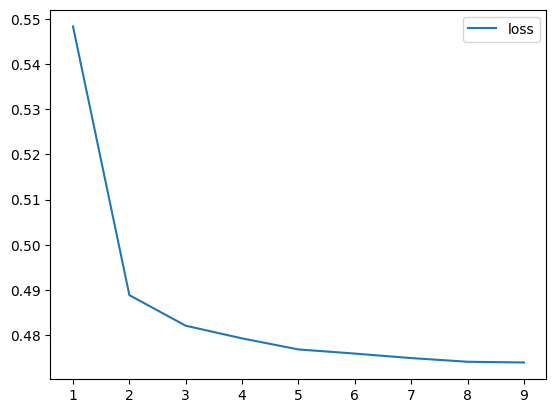

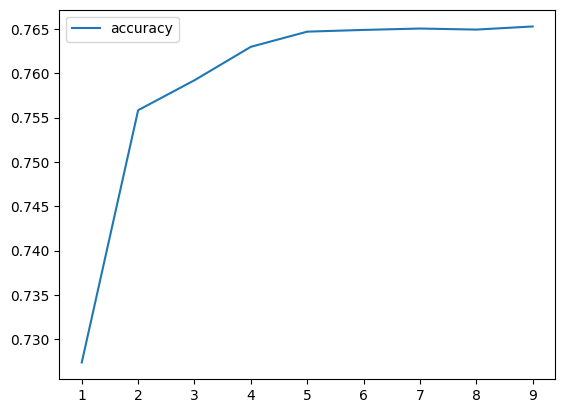

In [38]:
# Create a DataFrame containing third optimization training history
history_df_3 = pd.DataFrame(fit_model_3.history)

# Increase the index by 1 to match the number of epochs
history_df_3.index += 1

# Plot the loss
history_df_3.plot(y="loss")
plt.show()

print()

 # Plot the accuracy
history_df_3.plot(y="accuracy")
plt.show()

In [39]:
# Evaluate the second optimization model using the test data
model_loss, model_accuracy = nn_3.evaluate(X1_test_scaled,y1_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
# big difference!

268/268 - 0s - loss: 0.4839 - accuracy: 0.7548 - 322ms/epoch - 1ms/step
Loss: 0.483879417181015, Accuracy: 0.7547521591186523


In [40]:
# Export our third optimization model to HDF5 file
nn_3.save('AlphabetSoupCharity_Optimization2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
